In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter

ingreso_df = pd.read_csv("C:/Users/Pedro/Desktop/DAProyect/Telecomunicaciones/ingreso_percapita_Arg2010_2024.csv", encoding='latin1')
accesos_df = pd.read_csv("C:/Users/Pedro/Desktop/DAProyect/Telecomunicaciones/HojasSeparadas/1/Accesos_tecnologia_localidad.csv", encoding='latin1')
join_df = pd.read_excel("C:/Users/Pedro/Desktop/DAProyect/Telecomunicaciones/uniones/ingreso-vs-accesos.xlsx")
df_Velocidad= pd.read_csv(r"C:\Users\Pedro\Desktop\DAProyect\Telecomunicaciones\HojasSeparadas\Acc_vel_loc_sinrangos.csv")

In [14]:
ingreso_df.info()
accesos_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Anio                2475 non-null   int64  
 1   Provincia           2475 non-null   object 
 2   Localidad           2475 non-null   object 
 3   Clasificación       2475 non-null   object 
 4   Ingreso per cápita  2475 non-null   float64
 5   Población           2475 non-null   int64  
 6   Ingreso Total       2475 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 135.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   7753 non-null   object 
 1   Partido     7753 non-null   object 
 2   Localidad   7753 non-null   object 
 3   Tecnologia  7753 non-null   object 
 4   Link Indec  7753 non-null   obje

In [4]:
join_df.info()
df_Velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Anio                                     971 non-null    int64  
 1   Provincia                                971 non-null    object 
 2   Localidad                                971 non-null    object 
 3   Clasificación                            971 non-null    object 
 4   Ingreso per cápita                       971 non-null    float64
 5   Población                                971 non-null    int64  
 6   Ingreso Total                            971 non-null    float64
 7   Accesos_tecnologia_localidad.Tecnologia  971 non-null    object 
 8   Accesos_tecnologia_localidad.Accesos     969 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 68.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries

# Realizamos una correlacion de variables, dispersión y boxplot.

Esto se hizo para comprobar que dentro de una localidad, mientras mayor es el ingreso, mejor la tecnología. Concluimos que no existe tal relación ya que también depende del servicio que preste la empresa y su alcance

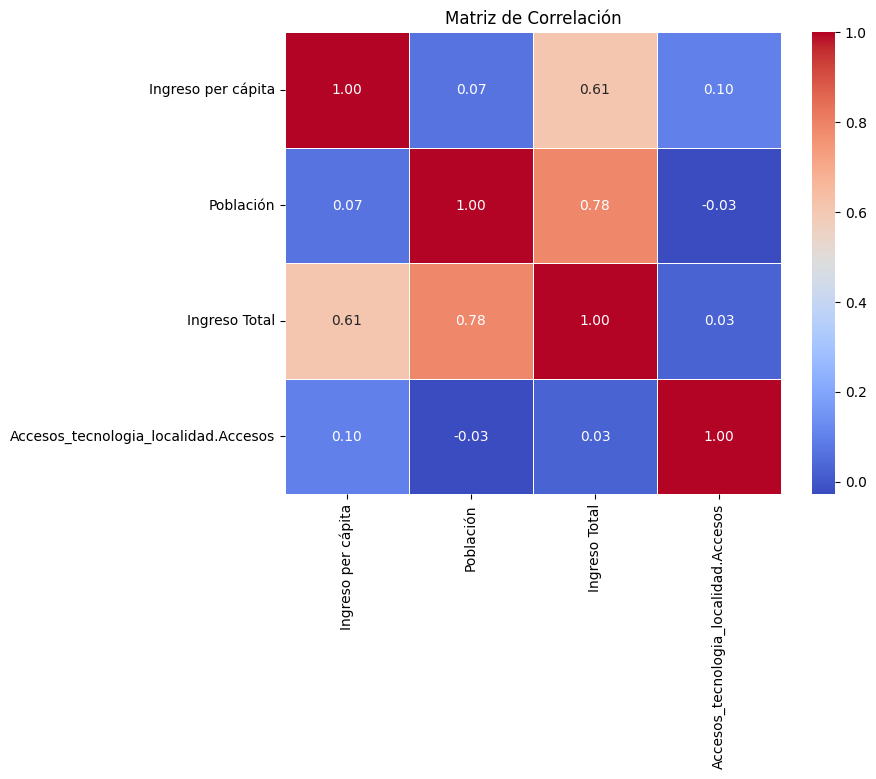

In [35]:


# Seleccionar solo las columnas numéricas relevantes
numerical_columns = ['Ingreso per cápita', 'Población', 'Ingreso Total', 'Accesos_tecnologia_localidad.Accesos']

# Eliminar filas con valores nulos en las columnas seleccionadas
correlation_data = join_df[numerical_columns].dropna()

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear un mapa de calor para la matriz de correlación
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5
)

# Título del gráfico
plt.title('Matriz de Correlación')
plt.show()






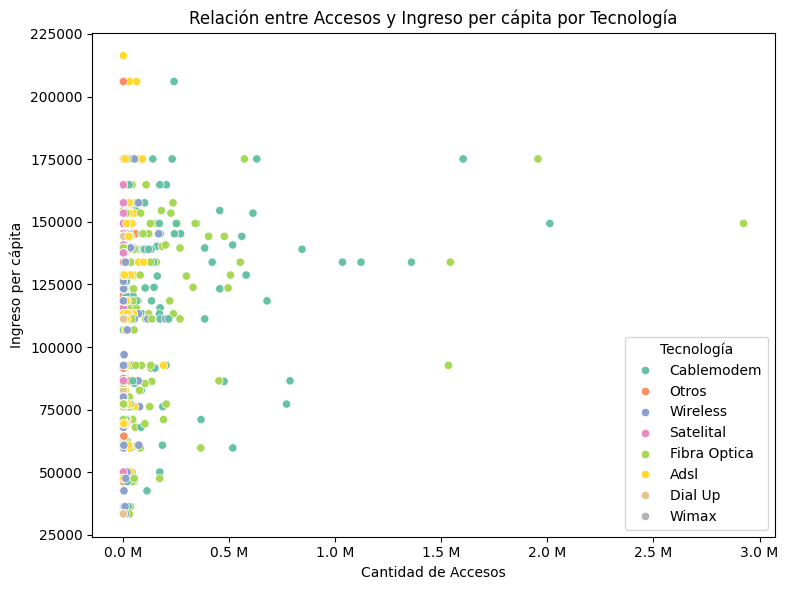

C:\Users\Pedro\AppData\Local\Temp\ipykernel_15324\4036578105.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


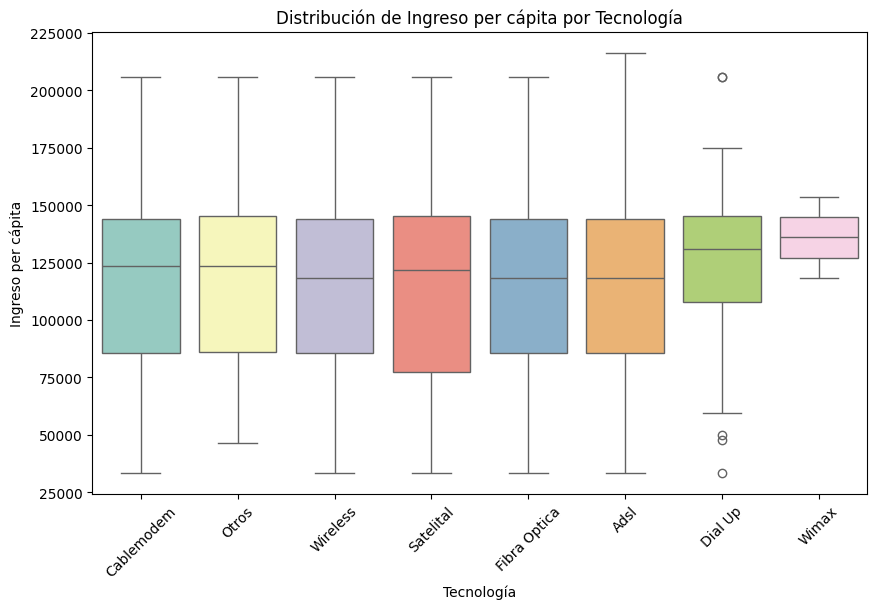

Correlación entre Accesos y Ingreso per cápita:
                                      Accesos_tecnologia_localidad.Accesos  \
Accesos_tecnologia_localidad.Accesos                              1.000000   
Ingreso per cápita                                                0.099955   

                                      Ingreso per cápita  
Accesos_tecnologia_localidad.Accesos            0.099955  
Ingreso per cápita                              1.000000  

Resultado del ANOVA:
F-statistic: 0.65, p-value: 0.7134


In [10]:

# Scatter plot: Accesos vs Ingreso per cápita
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=join_df, 
    x='Accesos_tecnologia_localidad.Accesos', 
    y='Ingreso per cápita', 
    hue='Accesos_tecnologia_localidad.Tecnologia', 
    palette='Set2'
)

# Personalizar el formato del eje X
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e6:.1f} M'))

# Añadir título y etiquetas
plt.title('Relación entre Accesos y Ingreso per cápita por Tecnología')
plt.xlabel('Cantidad de Accesos')
plt.ylabel('Ingreso per cápita')
plt.legend(title='Tecnología')

# Mostrar el gráfico
plt.tight_layout()
plt.show()




# Box plot: Comparación de ingreso per cápita por tecnología
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=join_df, 
    x='Accesos_tecnologia_localidad.Tecnologia', 
    y='Ingreso per cápita', 
    palette='Set3'
)
plt.title('Distribución de Ingreso per cápita por Tecnología')
plt.xlabel('Tecnología')
plt.ylabel('Ingreso per cápita')
plt.xticks(rotation=45)
plt.show()

# Correlación entre Accesos y Ingreso per cápita
correlation = join_df[['Accesos_tecnologia_localidad.Accesos', 'Ingreso per cápita']].dropna().corr()
print("Correlación entre Accesos y Ingreso per cápita:")
print(correlation)

# ANOVA: ¿Diferencias significativas en ingreso per cápita por tecnología?
technologies = join_df['Accesos_tecnologia_localidad.Tecnologia'].unique()
anova_data = [
    join_df[join_df['Accesos_tecnologia_localidad.Tecnologia'] == tech]['Ingreso per cápita'].dropna()
    for tech in technologies
]

anova_result = f_oneway(*anova_data)
print("\nResultado del ANOVA:")
print(f"F-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("Existen diferencias significativas en el ingreso per cápita según la tecnología utilizad")


# Analizamos cómo es la distribución de tecnologías por provincia con la cantidad de accesos.

Esto nos permitió ver que "Cablemodem" es una tecnología con gran cantidad de accesos junto con "Fibra Optica" y es común en todas las provincias.


Córdoba y Santa Fe,se puede ver que tiene la misma cantidad de accesos con "Fibra Óptica" y "Cablemodem"

Mendoza, Tucuman, Santa Cruz,San Juan y Catamarca: Predomina la "Fibra Óptica"

Buenos Aires y el resto de las provincias, tiene mayor predominancia "Cablemodem"

<Figure size 1400x800 with 0 Axes>

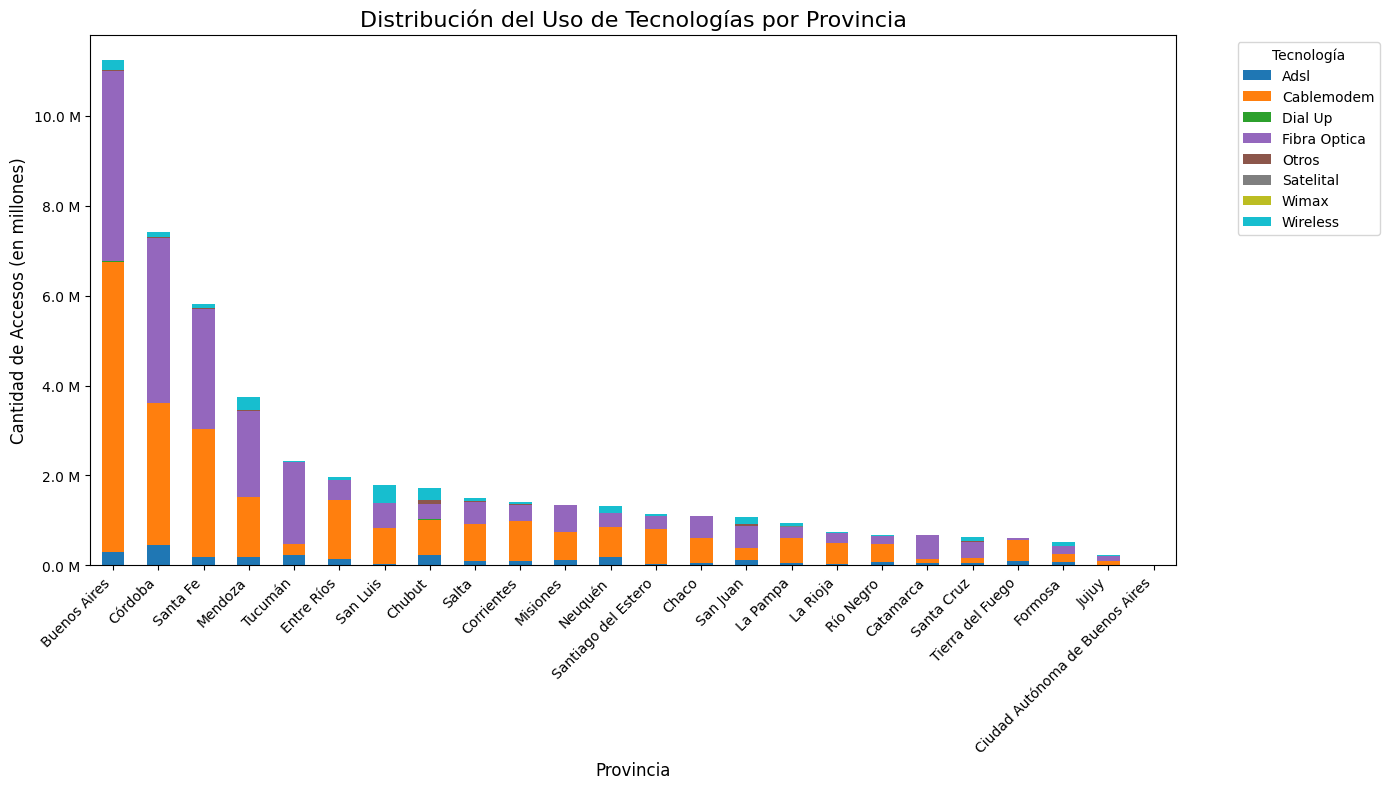

In [8]:
# Agrupamos los datos por provincia y tecnología para sumar accesos
grouped_data = join_df.groupby(['Provincia', 'Accesos_tecnologia_localidad.Tecnologia'])['Accesos_tecnologia_localidad.Accesos'].sum().unstack()

# Ordenamos las provincias por el total de accesos en orden descendente
grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values(ascending=False).index]

# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear el gráfico de barras apiladas
ax = grouped_data.plot(
    kind='bar', 
    stacked=True, 
    figsize=(14, 8), 
    colormap='tab10'
)

# Añadir título y etiquetas
plt.title("Distribución del Uso de Tecnologías por Provincia", fontsize=16)
plt.xlabel("Provincia", fontsize=12)
plt.ylabel("Cantidad de Accesos (en millones)", fontsize=12)

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45, ha='right')

# Añadir leyenda
plt.legend(title="Tecnología", bbox_to_anchor=(1.05, 1), loc='upper left')

# Formatear el eje Y para mostrar los valores en millones (por ejemplo, 10 M en lugar de 10,000,000)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e6:.1f} M'))

# Ajustar el diseño del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Desarrollamos 3 gráficos de barras:  
###       1* Ingresos per cápita por provincia
###       2* Velocidad contratada por provincia
###       3* Velocidad contratada por localidad

Esto lo hicimos para verificar si el ingreso per capita por provincia influía en la velocidad contratada. Se pudo verificar que dentro de las primeras 5 provincias con mayores ingresos, son 2 las que se repiten "Tierra del Fuego" y "Caba". Luego lo dividimos por localidad y encontramos que  "San Luis", una de las provincias que mayor velocidad tiene contratada,  tiene distribuida esa velocidad en 9 localidades, y que "Tierra del Fuego", estando en primer lugar, tiene concentrado una gran velocidad contratada en "Base Orcadas"

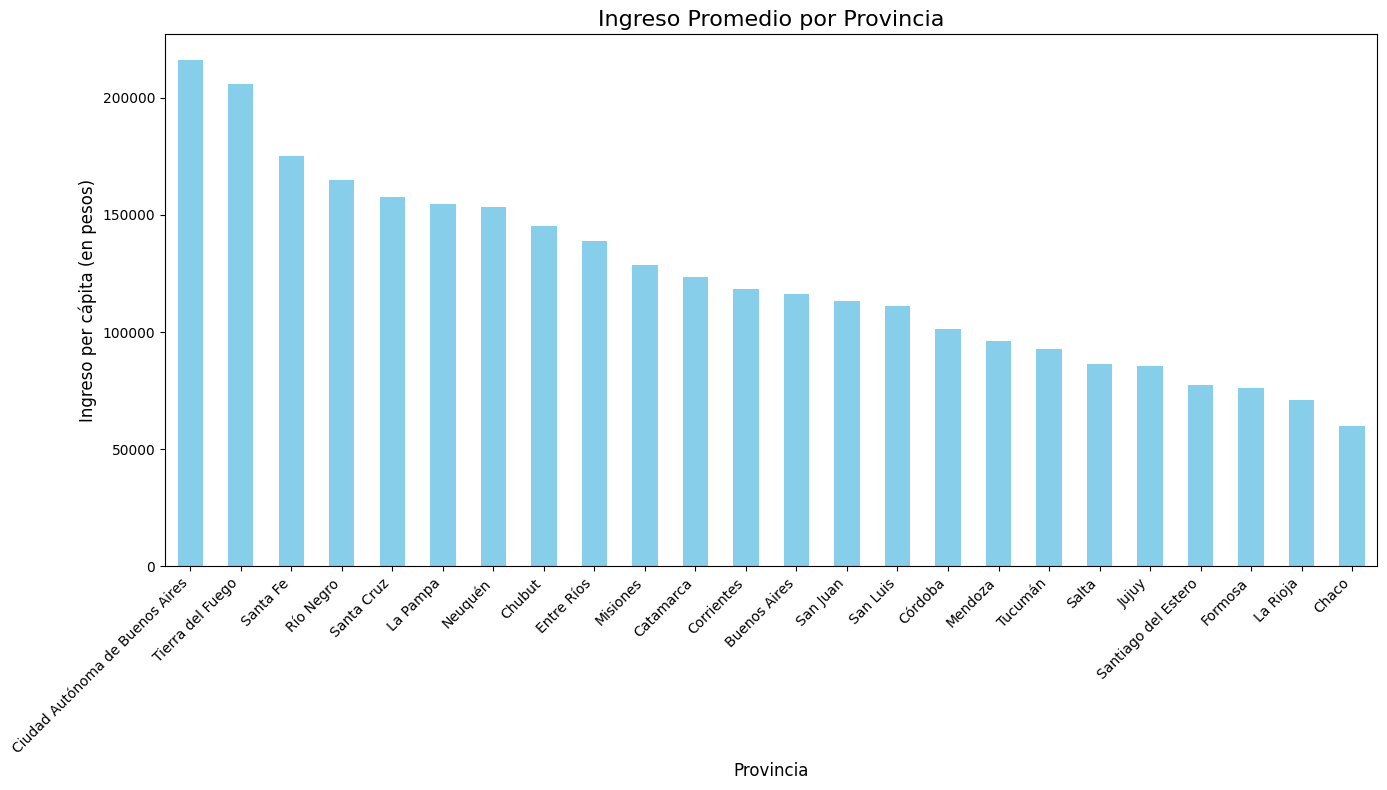

In [46]:
# Calcular el ingreso per cápita promedio por provincia
ingreso_promedio_por_provincia = join_df.groupby('Provincia')['Ingreso per cápita'].mean()

# Ordenar las provincias por el ingreso per cápita
ingreso_promedio_por_provincia = ingreso_promedio_por_provincia.sort_values(ascending=False)

# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear el gráfico de barras
ingreso_promedio_por_provincia.plot(kind='bar', color='skyblue')

# Añadir título y etiquetas
plt.title("Ingreso Promedio por Provincia", fontsize=16)
plt.xlabel("Provincia", fontsize=12)
plt.ylabel("Ingreso per cápita (en pesos)", fontsize=12)

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


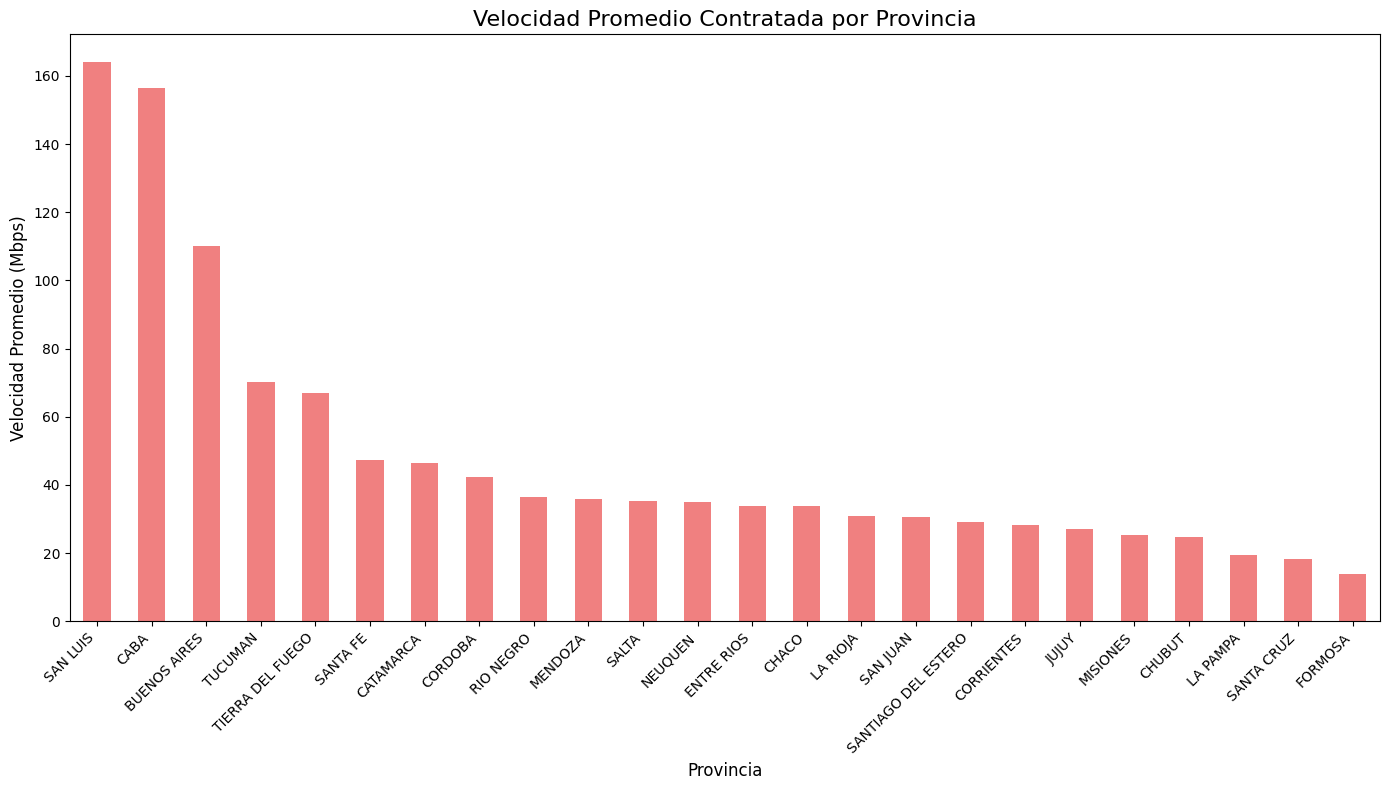

In [48]:
# Calculamos la velocidad promedio por provincia
velocidad_promedio_por_provincia = df_Velocidad.groupby('Provincia')['Velocidad'].mean()

# Ordenamos las provincias por la velocidad promedio
velocidad_promedio_por_provincia = velocidad_promedio_por_provincia.sort_values(ascending=False)

# Configuramos el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Creamos el gráfico de barras
velocidad_promedio_por_provincia.plot(kind='bar', color='lightcoral')

# Ttulo y etiquetas
plt.title("Velocidad Promedio Contratada por Provincia", fontsize=16)
plt.xlabel("Provincia", fontsize=12)
plt.ylabel("Velocidad Promedio (Mbps)", fontsize=12)

# Rotamos etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


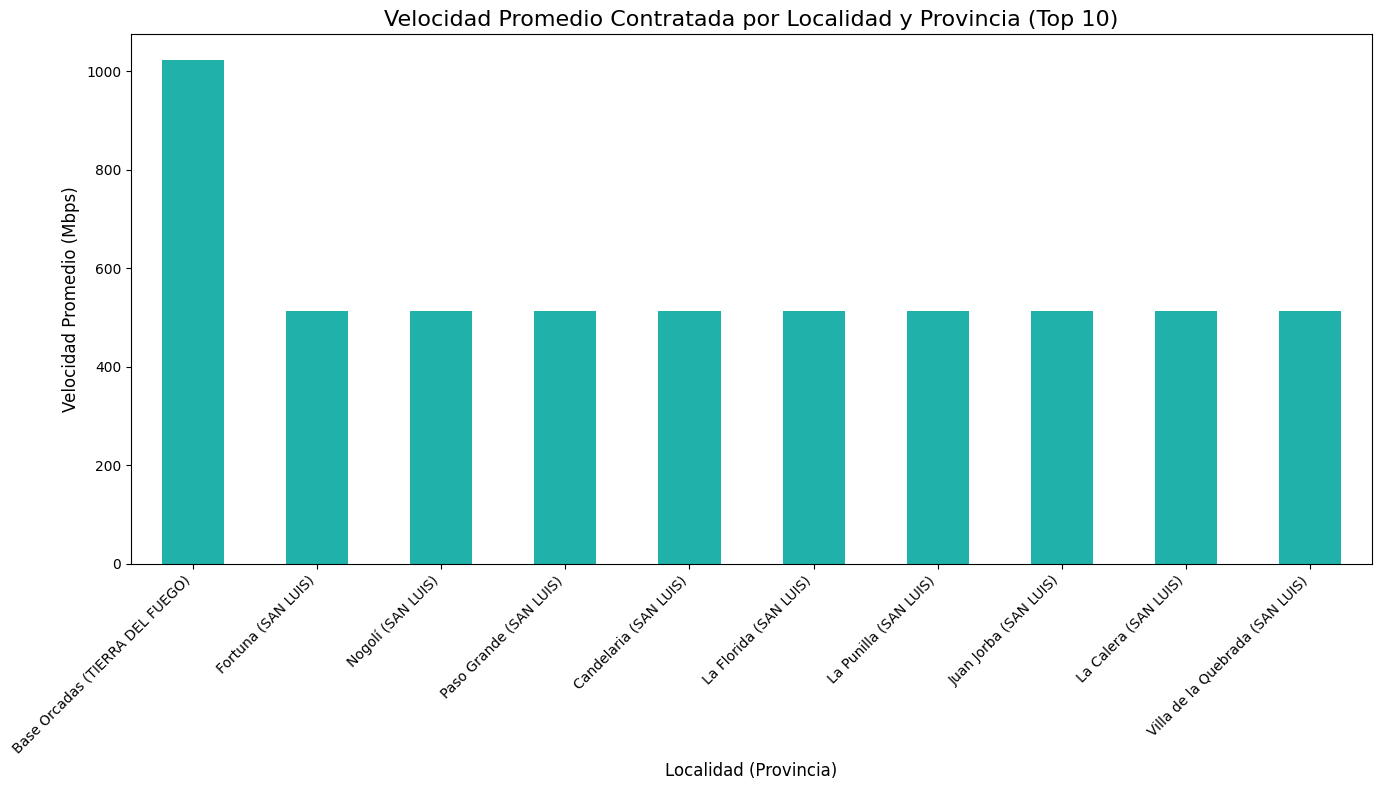

In [50]:
# velocidad promedio por localidad
velocidad_promedio_por_localidad = df_Velocidad.groupby(['Localidad', 'Provincia'])['Velocidad'].mean()

# Ordenamos las localidades por la velocidad promedio (opcional, solo las primeras 10 para visualización)
velocidad_promedio_por_localidad = velocidad_promedio_por_localidad.sort_values(ascending=False).head(10)

# Concatenamos la provincia al nombre de la localidad para el eje X
velocidad_promedio_por_localidad.index = [f'{localidad} ({provincia})' for localidad, provincia in velocidad_promedio_por_localidad.index]

# Configuramos el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Creamos el gráfico de barras
velocidad_promedio_por_localidad.plot(kind='bar', color='lightseagreen')

# título y etiquetas
plt.title("Velocidad Promedio Contratada por Localidad y Provincia (Top 10)", fontsize=16)
plt.xlabel("Localidad (Provincia)", fontsize=12)
plt.ylabel("Velocidad Promedio (Mbps)", fontsize=12)

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



In [32]:
df_Velocidad.describe()
#df_Velocidad.info()

,Velocidad,Accesos
count,18864.000000,18857.000000
mean,66.866042,612.828499
std,178.987138,6283.359677
min,0.000000,-5582.000000
25%,3.000000,3.000000
50%,10.000000,26.000000
75%,30.000000,180.000000
max,1024.000000,576789.000000


In [5]:
provincia_df = pd.read_csv("C:/Users/Pedro/Desktop/correcto/provincias.csv", encoding='latin1')
localidades_df = pd.read_csv("C:/Users/Pedro/Desktop/correcto/localidades.csv", encoding='latin1')
Accesos_Por_Tecnología_df = pd.read_csv("C:/Users/Pedro/Desktop/correcto/Accesos Por Tecnología.csv", encoding='latin1')
DialBAf_df = pd.read_csv("C:/Users/Pedro/Desktop/correcto/Dial-BAf.csv", encoding='latin1')
T_AccesosRango_df = pd.read_csv("C:/Users/Pedro/Desktop/correcto/Totales Accesos por rango.csv", encoding='latin1')
TotalesVMD_df = pd.read_csv("C:/Users/Pedro/Desktop/correcto/Totales VMD.csv", encoding='latin1')
VelocidadAVGprov_df = pd.read_csv("C:/Users/Pedro/Desktop/correcto/Velocidad % por prov.csv", encoding='latin1')

In [6]:
provincia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_prov    1770 non-null   int64  
 1   Provincia  1770 non-null   object 
 2   Longitud   1770 non-null   float64
 3   Latitud    1770 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 55.4+ KB


In [7]:
localidades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_localidad            1770 non-null   int64  
 1   Localidad/Departamento  1770 non-null   object 
 2   id_prov                 1770 non-null   int64  
 3   Latitud                 1770 non-null   float64
 4   Longitud                1770 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 69.3+ KB


In [8]:
Accesos_Por_Tecnología_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AÃ±o           1008 non-null   object 
 1   Trimestre      1008 non-null   object 
 2   Provincia      1007 non-null   object 
 3   ADSL           1007 non-null   float64
 4   Cablemodem     1007 non-null   float64
 5   Fibra Ã³ptica  1007 non-null   float64
 6   Wireless       1007 non-null   float64
 7   Otros          1007 non-null   float64
 8   Total          1007 non-null   float64
dtypes: float64(6), object(3)
memory usage: 71.1+ KB


In [9]:
DialBAf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AÃ±o              1992 non-null   int64  
 1   Trimestre         1992 non-null   int64  
 2   Provincia         1992 non-null   object 
 3   Banda ancha fija  1992 non-null   int64  
 4   Dial up           1988 non-null   float64
 5   Total             1992 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 93.5+ KB


In [10]:
T_AccesosRango_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   AÃ±o                     42 non-null     int64
 1   Trimestre                42 non-null     int64
 2   Hasta 512 kbps           42 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  42 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    42 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   42 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  42 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  42 non-null     int64
 8   MÃ¡s de 30 Mbps          42 non-null     int64
 9   OTROS                    42 non-null     int64
 10  Total                    42 non-null     int64
dtypes: int64(11)
memory usage: 3.7 KB


In [11]:
TotalesVMD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AÃ±o                    42 non-null     int64  
 1   Trimestre               42 non-null     int64  
 2   Mbps (Media de bajada)  42 non-null     float64
 3   Trimestre.1             42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [15]:
VelocidadAVGprov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   aã_o                   1008 non-null   int64  
 1   trimestre              1008 non-null   int64  
 2   provincia              1008 non-null   object 
 3   mbps_media_de_bajada_  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB


El tratamiento de nulos y correcta colocación "Type" de los datos, fue trabajado en Power Query de Excel y luego subidos a Power BI.

Correcciones "varias" fueron realizadas en la misma herramienta de visualización para la correcta relación entre las tablas.

Gracias por leerme.
